<a href="https://colab.research.google.com/github/rogemaro/Hurto_Personas_Colombia_2021/blob/main/Hurto_a_Personas_Colombia_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hurto a Pesonas Colombia 2021**

El presente análisis de datos se apoya en los datos proporcionados por la Policina Nacional Colombiana. Se puede recurrir a los mismos en el siguiente enlace: https://www.policia.gov.co/grupo-informacion-criminalidad/estadistica-delictiva

Los datos aquí presentes hacen referencia a la cantidad de hurtos reportados diariamente a nivel nacional.


**1 Configurando el ambiente de trabajo en la nube**

Se procede a realizar la configuración de nuestro entorno en la nube, para que se comporte como un entorno local de trabajo y se pueda manejar el sistema de archivos

In [67]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
%cd "/content/drive/My Drive/Colab Notebooks/Personal Projects/data"
!ls

/content/drive/My Drive/Colab Notebooks/Personal Projects/data
hurto_a_personas.xlsx  hurto_personas_2021.csv


**2 Cargando Datos**

In [69]:
# Importamos las librerias que nos van a permitir la manipulación y análisis de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df_base = pd.read_excel("hurto_a_personas.xlsx", skiprows=9)
df_base

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIO,GENERO,*AGRUPA EDAD PERSONA,FECHA HECHO,CANTIDAD
0,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,2021-02-12 00:00:00,1.0
1,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADOLESCENTES,2021-02-24 00:00:00,1.0
2,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,2021-03-11 00:00:00,1.0
3,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,2021-03-21 00:00:00,1.0
4,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,2021-04-03 00:00:00,1.0
...,...,...,...,...,...,...,...,...
78696,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,245911.0
78697,FUENTE: DIJIN-POLIC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78698,*Agrupación referente a la clasificación del c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78699,Elaborado: patrullero José Cañon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#cambiamos el formato del archivo de xslx a csv, siendo un formato más adecuado para trabajar de una manera más fluida
df_base.to_csv("/content/drive/My Drive/Colab Notebooks/Personal Projects/data/hurto_personas_2021.csv", index = False)

In [72]:
%cd "/content/drive/My Drive/Colab Notebooks/Personal Projects/data"
!ls

/content/drive/My Drive/Colab Notebooks/Personal Projects/data
hurto_a_personas.xlsx  hurto_personas_2021.csv


In [73]:
df_original = pd.read_csv("hurto_personas_2021.csv") #al ejecutar el código nos lanza na advertencia donde nos indica que no entiende el formato de ls valores, eso se debe a las últimas filas
df_original

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIO,GENERO,*AGRUPA EDAD PERSONA,FECHA HECHO,CANTIDAD
0,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,2021-02-12 00:00:00,1.0
1,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADOLESCENTES,2021-02-24 00:00:00,1.0
2,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,2021-03-11 00:00:00,1.0
3,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,2021-03-21 00:00:00,1.0
4,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,2021-04-03 00:00:00,1.0
...,...,...,...,...,...,...,...,...
78696,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,245911.0
78697,FUENTE: DIJIN-POLIC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78698,*Agrupación referente a la clasificación del c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78699,Elaborado: patrullero José Cañon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#Realizamos una copia profunda para no alterar el data frame original
df = df_original.copy(deep=True)
df

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIO,GENERO,*AGRUPA EDAD PERSONA,FECHA HECHO,CANTIDAD
0,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,2021-02-12 00:00:00,1.0
1,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADOLESCENTES,2021-02-24 00:00:00,1.0
2,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,2021-03-11 00:00:00,1.0
3,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,2021-03-21 00:00:00,1.0
4,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,2021-04-03 00:00:00,1.0
...,...,...,...,...,...,...,...,...
78696,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,245911.0
78697,FUENTE: DIJIN-POLIC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78698,*Agrupación referente a la clasificación del c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78699,Elaborado: patrullero José Cañon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.tail(10)


,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIO,GENERO,*AGRUPA EDAD PERSONA,FECHA HECHO,CANTIDAD
78691,VALLE,GUADALAJARA DE BUGA,76111000,NO REPORTADO,MASCULINO,ADULTOS,2021-11-28 00:00:00,1.0
78692,VALLE,PALMIRA,76520000,NO REPORTADO,FEMENINO,ADULTOS,2021-10-28 00:00:00,1.0
78693,VALLE,PALMIRA,76520000,NO REPORTADO,MASCULINO,ADULTOS,2021-11-24 00:00:00,1.0
78694,VALLE,PRADERA,76563000,NO REPORTADO,MASCULINO,ADULTOS,2021-07-20 00:00:00,1.0
78695,VICHADA,PUERTO CARREÑO (CT),99001000,NO REPORTADO,FEMENINO,ADULTOS,2021-05-25 00:00:00,1.0
78696,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,245911.0
78697,FUENTE: DIJIN-POLIC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78698,*Agrupación referente a la clasificación del c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78699,Elaborado: patrullero José Cañon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78700,Revisado: IT Cesar Andres Marquez,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.drop([78696, 78697, 78698, 78699, 78700], axis = 0, inplace = True) #eliminamos las ultimas 5 columnas que no tienen relevancia y generan ruido en la exploración de la base de datos

In [77]:
df

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIO,GENERO,*AGRUPA EDAD PERSONA,FECHA HECHO,CANTIDAD
0,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,2021-02-12 00:00:00,1.0
1,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADOLESCENTES,2021-02-24 00:00:00,1.0
2,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,2021-03-11 00:00:00,1.0
3,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,2021-03-21 00:00:00,1.0
4,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,2021-04-03 00:00:00,1.0
...,...,...,...,...,...,...,...,...
78691,VALLE,GUADALAJARA DE BUGA,76111000,NO REPORTADO,MASCULINO,ADULTOS,2021-11-28 00:00:00,1.0
78692,VALLE,PALMIRA,76520000,NO REPORTADO,FEMENINO,ADULTOS,2021-10-28 00:00:00,1.0
78693,VALLE,PALMIRA,76520000,NO REPORTADO,MASCULINO,ADULTOS,2021-11-24 00:00:00,1.0
78694,VALLE,PRADERA,76563000,NO REPORTADO,MASCULINO,ADULTOS,2021-07-20 00:00:00,1.0


**3 Exploración de los datos**

In [78]:
#Qué columnas tienen los datos?
df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO_DANE', 'ARMAS MEDIO', 'GENERO',
       '*AGRUPA EDAD PERSONA', 'FECHA HECHO', 'CANTIDAD '],
      dtype='object')

Al inspeccionar las columnas, nos ofrece una información de las variables que se relacionan al momento de reportar un hurto, en las cuales se clasifican por departamento, municipio, codigo porporcionado por el DANE para clasificar al municipio, las armas o tipo de modalidad que se utilizó para cometer el delito, el género de la persona quién comete el delito, edad de la persona quién comete el délito, la fecha diaria y cantidad de hurtos.

In [79]:
#Qué tamaño tienen los datos
df.shape

(78696, 8)

In [80]:
#Hay valores nulos en los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78696 entries, 0 to 78695
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPARTAMENTO          78696 non-null  object 
 1   MUNICIPIO             78696 non-null  object 
 2   CODIGO_DANE           78696 non-null  object 
 3   ARMAS MEDIO           78696 non-null  object 
 4   GENERO                78696 non-null  object 
 5   *AGRUPA EDAD PERSONA  78696 non-null  object 
 6   FECHA HECHO           78696 non-null  object 
 7   CANTIDAD              78696 non-null  float64
dtypes: float64(1), object(7)
memory usage: 5.4+ MB


In [81]:
#cómo se distribuyen las variables númericas
df.describe()

,CANTIDAD
count,78696.000000
mean,3.124822
std,8.656191
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,140.000000


In [82]:
#Cómo se describen las variables categóricas
df.describe(include=["O"])

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIO,GENERO,*AGRUPA EDAD PERSONA,FECHA HECHO
count,78696,78696,78696,78696,78696,78696,78696
unique,32,914,1314,10,3,4,334
top,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,MASCULINO,ADULTOS,2021-10-16 00:00:00
freq,13982,4209,4027,34681,45374,76470,315


**3.1 Procesamiento de datos**

In [83]:
#del análisis anterior me permite determinar que la variable de CODIGO_DANE es innecesaria y se procede a su eliminación
df.drop(["CODIGO_DANE"], axis = 1, inplace = True)

In [84]:
# Cambiamos la fecha del hecho de un string a un formato datetime para poder trabajar con series de tiempo
df["FECHA HECHO"] = pd.to_datetime(df["FECHA HECHO"]) 
df.head(1)

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIO,GENERO,*AGRUPA EDAD PERSONA,FECHA HECHO,CANTIDAD
0,AMAZONAS,LETICIA (CT),ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,2021-02-12,1.0


In [85]:
df.rename(columns={"CANTIDAD ": "CANTIDAD"}, inplace=True) #renombramos la columna CANTIDAD, ya que tiene un espacio en blanco y nos generará problemas a futuro

**3.2 EDA**

In [106]:
df.groupby(["DEPARTAMENTO"])["CANTIDAD"].sum().to_frame().sort_values("CANTIDAD", ascending = False)

,CANTIDAD
DEPARTAMENTO,
CUNDINAMARCA,111980.0
ANTIOQUIA,30844.0
VALLE,21701.0
ATLÁNTICO,12850.0
SANTANDER,10154.0
TOLIMA,5669.0
BOLÍVAR,5650.0
NARIÑO,4956.0
META,4757.0


In [107]:
df.groupby(["MUNICIPIO"])["CANTIDAD"].sum().to_frame().sort_values("CANTIDAD", ascending = False)

,CANTIDAD
MUNICIPIO,
BOGOTÁ D.C. (CT),96816.0
MEDELLÍN (CT),20517.0
CALI (CT),16566.0
BARRANQUILLA (CT),9333.0
SOACHA,5548.0
...,...
SIACHOQUE,1.0
CERINZA,1.0
EL CARMEN DE CHUCURÍ,1.0


Aquí se organizo los datos de manera descendente, para poder corroborar en que Departamento del país se presentan más robos, se recurrio a una sumatoria, debido a que un solo reporte equivale en ocasiones a varios hurtos, es decir que una persona puede reportar multiples hurtos cometidos. En este caso Cundinamarca es el departamento que más hurtos presento con 111980, seguido de Antioquia con cerca de 30.000 y Valle con 21.701. El departamento con menos hurtos es Vaupés con 24 hurtos reportados hasta el 30 de Noviembre de 2021. Cabe resaltar que los hurtos cometidos corresponden a una correlación positiva entre el tramaño del departamento. Si se realiza una desagregación por municipios se tiene que las capitales de los principales departamentos son las que presentan mayor número de hurtos, de otra parte los municipios de 6 categoria tienen indices de hurtos muy bajos.

In [88]:
from matplotlib import rcParams
rcParams["figure.figsize"] = 12, 7 #cambiamos la relación de aspecto y tamaño de los gráficos

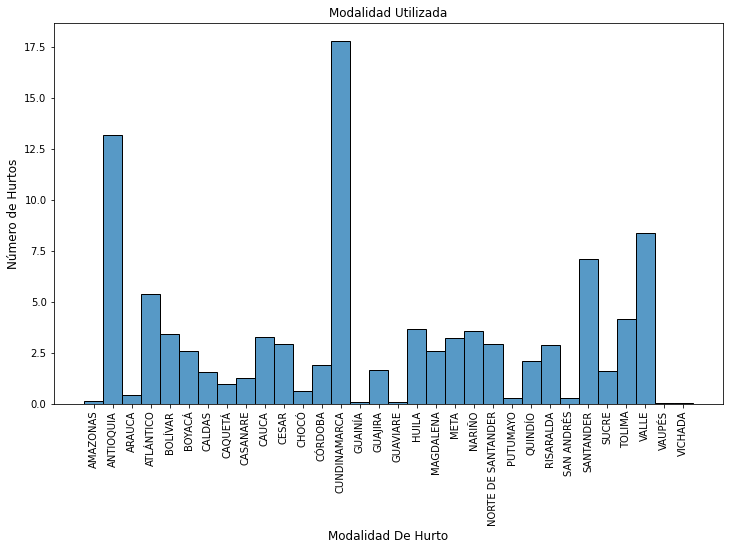

In [102]:
sns.histplot(
    data = df,
        x = "DEPARTAMENTO",
        stat = "percent")

plt.title("Modalidad Utilizada", fontsize = 12)
plt.ylabel("Número de Hurtos", fontsize = 12)
plt.xlabel("Modalidad De Hurto", fontsize = 12)
plt.xticks(rotation = "vertical")
plt.show()

AL analizar los datos en base a porcentajes de participación de los totales, se observa que Cundinamarca aporta el 17.5% de los hurtos, seguido de Antioquia con el 13%, Valle del Cauca con el 7.5% y Santander alrededor del 6%.

In [90]:
df["GENERO"].value_counts() / df["GENERO"].value_counts().sum() * 100 #realizamos una transformación de a porcentajes

MASCULINO        57.657314
FEMENINO         42.327437
NO  REPORTADO     0.015249
Name: GENERO, dtype: float64

Al analizar los porcentajes de la categoria de género, se tiene que el 57.65% de los delitos reportados fueron cometidos por personas de género masculino; el 42,32% fueron cometidos por personas del género femenino; y el restante 0.015% no se pudo identificar el género del asaltante.

In [91]:
df.groupby(["GENERO", "*AGRUPA EDAD PERSONA"])["CANTIDAD"].sum().to_frame()

CANTIDAD
GENERO        *AGRUPA EDAD PERSONA          
FEMENINO      ADOLESCENTES             752.0
              ADULTOS                98503.0
              MENORES                  117.0
MASCULINO     ADOLESCENTES            1395.0
              ADULTOS               144992.0
              MENORES                  140.0
NO  REPORTADO NO  REPORTADO             12.0

La mayoria de los delitos de hurto cometidos, agrupados en edad categórica, fueron perpetrados por adultos en los dos géneros, seguido de los adolescentes y una pequeña proporcion por menores. En todos los casos hay una mayor porporción de delitos cometidos por personas de género masculino.

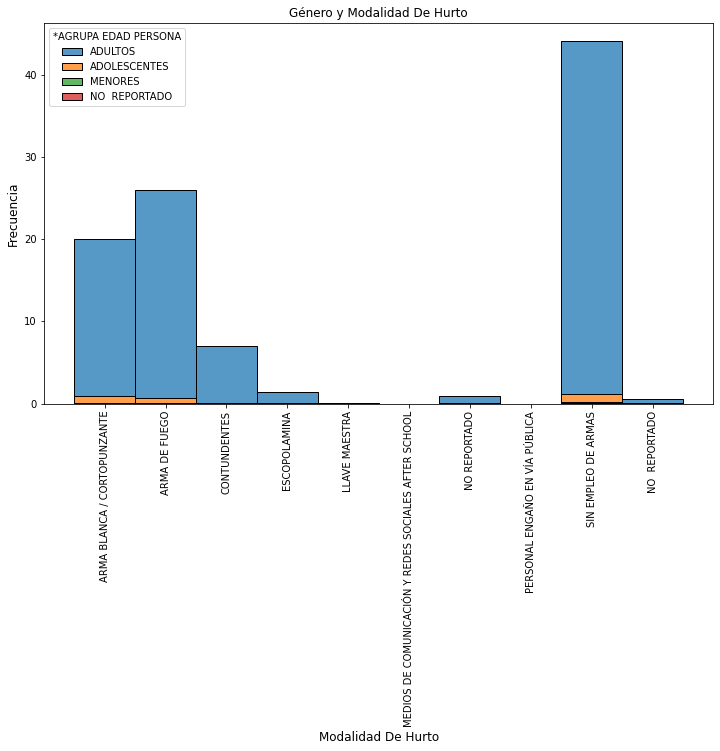

In [103]:
sns.histplot(
    data = df,
        x = "ARMAS MEDIO",
        hue = "*AGRUPA EDAD PERSONA",
        multiple = "stack",
        stat = "percent")

plt.title("Edad y Modalidad De Hurto", fontsize = 12)
plt.ylabel("Porcentaje", fontsize = 12)
plt.xlabel("Modalidad De Hurto", fontsize = 12)
plt.xticks(rotation = "vertical")
plt.show()

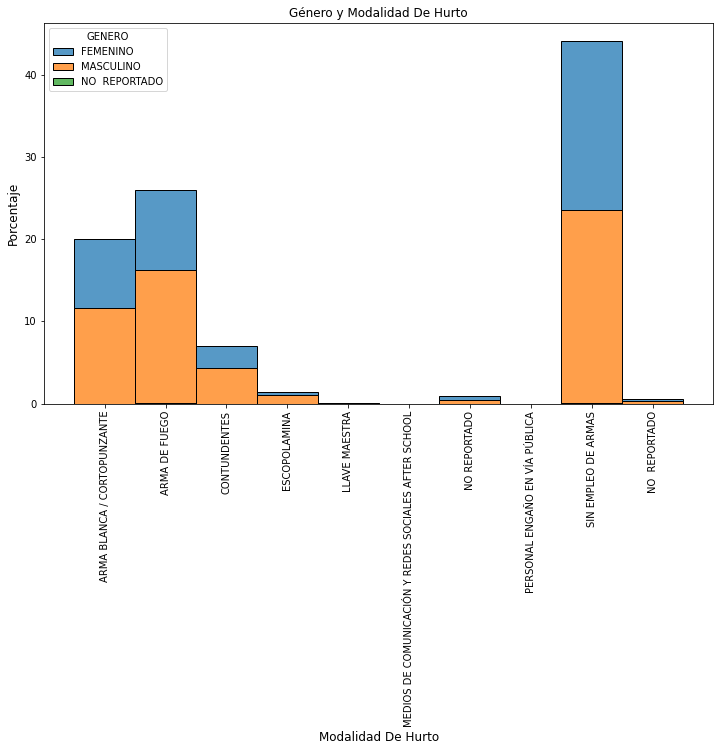

In [98]:
sns.histplot(
    data = df,
        x = "ARMAS MEDIO",
        hue = "GENERO",
        binwidth = 0.5,
        multiple = "stack",
        stat = "percent")

plt.title("Género y Modalidad De Hurto", fontsize = 12)
plt.ylabel("Porcentaje", fontsize = 12)
plt.xlabel("Modalidad De Hurto", fontsize = 12)
plt.xticks(rotation = "vertical")
plt.show()




Al cruzar las categorias de genero y la modalidad de hurto que fue empleada se ecuentra que el medio de hurto más utilizado es sin empleo de armas, representando alrededor del 43%, en el cual se encuentran submodalidades como el "cosquilleo", "raponaso", "abandono de pertenencias", etc. De otra parte se encuentra seguido de una forma muy violenta de robo, haciendo uso de armas de fuego, representando el 27%; la modalidad por arma cortopunzante representa el 20% de los hurtos totales; el uso de artefactos contundentes el 6% y una forma de hurto popular en Colombia que es el uso de escopolamina se encuentra alrededor del 1%. 

En todos los casos de hurtos presentados, la mayor proporción segun la modalidad se atribuye al género masculino en su ejecución, a excepción de la modalidad que no emplea armas, en la cual la proporción entre hombres y mujeres es similar.

Un análisis muy importante que se desprende y de caracter preocupante cuando se comparan las formas de hurto violentas, frente a las no violentas, es que si sumamos la proporción de armas de fuego, armas cortopunzantes, artefactos contundentes y el uso de escopolamina, se encuentra que representan más de la mitad de los hurtos cometidos. Tiene especial atención este hecho debido a que atentan directamente contra la vida e integridad de la persona.

In [95]:
df_seriet = df.groupby(pd.Grouper(key = "FECHA HECHO", freq = "M"))[["CANTIDAD"]].sum() #Definimos la serie temporal y la agrupamos por mes sumando la cantidad de hechos mensuales
df_seriet

,CANTIDAD
FECHA HECHO,
2021-01-31,17898.0
2021-02-28,19342.0
2021-03-31,22196.0
2021-04-30,18422.0
2021-05-31,21146.0
2021-06-30,22728.0
2021-07-31,24165.0
2021-08-31,24408.0
2021-09-30,23565.0


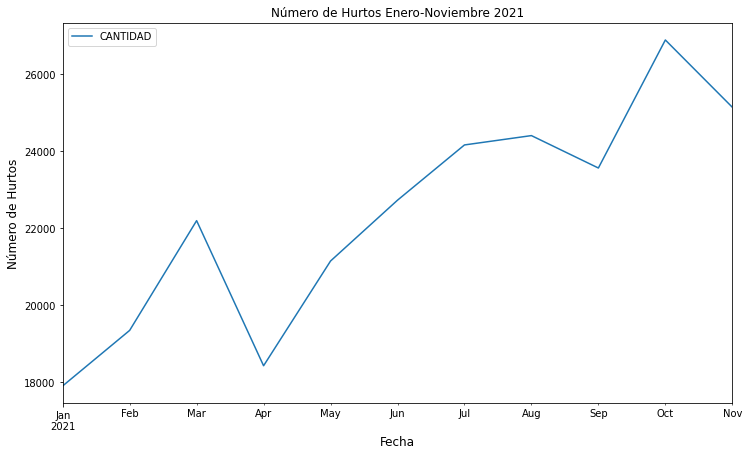

In [96]:
df_seriet.plot()
plt.title("Número de Hurtos Enero-Noviembre 2021", fontsize = 12)
plt.ylabel("Número de Hurtos", fontsize = 12)
plt.xlabel("Fecha", fontsize = 12)
plt.show()

El 2021 fue uno de los años más inseguros percibidos por los Colombianos y Colombianas, presentandose en su mayoria delitos de hurto, al analizar la tendencia de la serie de tiempo a lo largo del año, se partio de una cifra de 18000 hurtos en enero, suplicandose hasta su pico más alto en Octubre. Tuvo una caida en el mes de abril, un hecho que se puede manifestar por el inicio del paro nacional, sin embargo comenzó su ascenso hasta octubre mes en el cual las encuestas de seguridad ciudadana percibieron como el más inseguro en muchos años, para el mes de noviembre se comenzo a percibir una baja.